In [1]:
import cv2 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-03-07 22:30:26.058821: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741366826.106493    8685 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741366826.119754    8685 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 22:30:26.194572: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Augmenting a single image

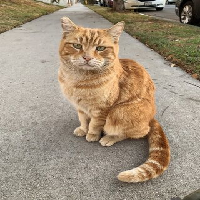

In [16]:
img = image.load_img("./cat.jpg", target_size=(200, 200))
img

In [17]:
# converting image to numpy array
img = image.img_to_array(img)

# reshaping to make it a batch
input_batch = img.reshape(1, 200, 200, 3)
input_batch.shape

(1, 200, 200, 3)

In [18]:
# Making the Data Generator Object - For generating augmented images

datagen = ImageDataGenerator(
    rotation_range=30,      # min rotation = 0, max rotation = 30 degrees
    shear_range=0.2,        # min shear = 0, max sheer = 0.2 (between 0 and 1) 
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [25]:
import os 
os.makedirs("single_image_augmentation", exist_ok=True)

i = 0 

for output in datagen.flow(input_batch, batch_size=1, save_to_dir="single_image_augmentation"):
    i = i + 1
    if i == 10:
        break

### Augmenting multiple train data from a folder 

- This method does not save the images
- Instead we pass a generator objects that uses the ImageDataGenerator to create and pass images to fit on the go
- The number of augmented images created depends on the batch_size (of the generator) and epochs
    - The number of images created depends on batch_size and epochs.
    - The generator does not store augmented images—it creates new ones on the fly for every epoch.
    - If you have 100 original images and train for 10 epochs, your model sees 100 × 10 = 1000 augmented versions.
    - If batch_size=32, each batch contains 32 augmented images.

## Ehh ? What did i write ???
## Check again chatgpt how many augmented images are created

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1/255,       # normalize inputs (so we dont need to do it manually again)
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1/255       # only normalizing cuz we dont need to augment test data
)

# now we make the generator that we will pass onto the model in place of X_train 
# (similar to the generator we used in dog vs cat classifier)
train_generator = train_datagen.flow_from_directory(
    "./train",                  # the training dataset
    target_size=(150, 150),     # automatically resize images 
    batch_size=32,
    class_mode="binary"         # since binary classification
)

validation_generator = test_datagen.flow_from_directory(
    "./test",
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

Found 108 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


In [19]:
# Now create the model and pass the generators for training and prediction

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer

model = Sequential(
    [
        InputLayer(shape=(150, 150, 3)),

        Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
        MaxPool2D(pool_size=(2,2)),
        Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
        MaxPool2D(pool_size=(2,2)),
        Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
        MaxPool2D(pool_size=(2,2)),

        Flatten(),

        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1, activation="sigmoid")
    ]
)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 560ms/step - accuracy: 0.5272 - loss: 0.8250 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5000 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6978
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4451 - loss: 0.7073 - val_accuracy: 0.5000 - val_loss: 0.6963
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4843 - loss: 0.6920 - val_accuracy: 0.6250 - val_loss: 0.6898
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.5637 - loss: 0.6882 - val_accuracy: 0.6250 - val_loss: 0.6859
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.4843 - loss: 0.6850 - val_accuracy: 0.5000 - val_loss: 0.6868
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5722 - loss: 0.6726 - val_accuracy: 0.6389 - val_loss: 0.6757
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6274 - loss: 0.6590 - val_accuracy: 0.6389 - val_loss: